# Requirements for execution

In [1]:
print('The following were executed using:')
!python -V

The following were executed using:
Python 3.12.2


In [2]:
# Required installs
%pip install p_tqdm --quiet
%pip install keras==3.3.3 --quiet
%pip install tensorflow==2.16.1 --quiet
%pip install tqdm==4.66.4 --quiet
%pip install ucimlrepo --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Required libraries
import numpy as np
import pandas as pd

import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

from itertools import combinations_with_replacement
from tqdm import tqdm

from ucimlrepo import fetch_ucirepo 


2024-06-02 10:15:16.883856: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 10:15:16.890963: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 10:15:16.939190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 10:15:18.058241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Get UC Irvine dataset

According to code provided by them in their website.

In [4]:
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

# Exploratory Data Analysis


In [5]:
# Show shape
print('>>> Data shape:')
print(f'{X.shape=}')
print()

# Summary of columns
print('>>> Columns summary:')
print(X.info())
print()

# First 5 obs
print('>>> First 5 obs: ')
print(X.head(5))
print()

>>> Data shape:
X.shape=(3810, 7)

>>> Columns summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 208.5 KB
None

>>> First 5 obs: 
    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987      

In [6]:
X.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


Es necessario estandarizar los datos en X antes de aplicar el modelo

In [7]:
# Show shape
print('>>> Data shape:')
print(f'{y.shape=}')
print()

# Summary of columns
print('>>> Columns summary:')
print(y.info())
print()

# First 5 obs
print('>>> First 5 obs: ')
print(y.head(5))
print()

print('>>> Class summary')
print(y.describe())


>>> Data shape:
y.shape=(3810, 1)

>>> Columns summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   3810 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB
None

>>> First 5 obs: 
    Class
0  Cammeo
1  Cammeo
2  Cammeo
3  Cammeo
4  Cammeo

>>> Class summary
           Class
count       3810
unique         2
top     Osmancik
freq        2180


In [8]:
print(f'>>> Unique values are {y["Class"].unique()}')

>>> Unique values are ['Cammeo' 'Osmancik']


As there's no missing data, we can get ahead without any trouble.

In [9]:
classes = pd.Categorical(y['Class']).codes

# Split data into train and test

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, classes, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=123
                                                    )

print(f'Train shape \n{X_train.shape=} \n{y_train.shape=}')
print('--')
print(f'Test shape \n{X_test.shape=} \n{y_test.shape=}')


Train shape 
X_train.shape=(2857, 7) 
y_train.shape=(2857,)
--
Test shape 
X_test.shape=(953, 7) 
y_test.shape=(953,)


As the data has mutiple scale values, for SVM and Neural Nets is a common practice, for better results, to standardize data before getting it into the model.

To do so, the class ```StandardScaler()``` is used.
To grant data from test is never seen in training of the model, the scaler is trained only with train data. Then is applyed to test data.

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)

# Apply scaling trained with train data to test data
X_test = scaler.transform(X_test)

[[-0.91660231 -0.70038982 -0.78009928 ... -0.18046658 -0.94278033
  -1.19791637]
 [ 0.7761571   0.60202578  0.32449068 ... -0.39002865  0.75924967
  -0.91723326]
 [-2.40316645 -2.35794262 -1.87562184 ...  0.22850321 -2.41907095
   1.30050268]
 ...
 [-0.02846518  0.11070705  0.04856738 ...  0.13923897  0.03542365
   1.33764701]
 [-0.3129916  -0.35483651 -0.25995189 ...  0.0237331  -0.35316255
  -0.51110961]
 [-0.78816224 -0.78212602 -1.0155616  ... -1.00670936 -0.74848723
  -0.17087521]]


Before getting dive into modelling, there's a necessity of checking the class balance of the data.

Therefore, the following histogram is shown.

array([[<Axes: title={'center': '0'}>]], dtype=object)

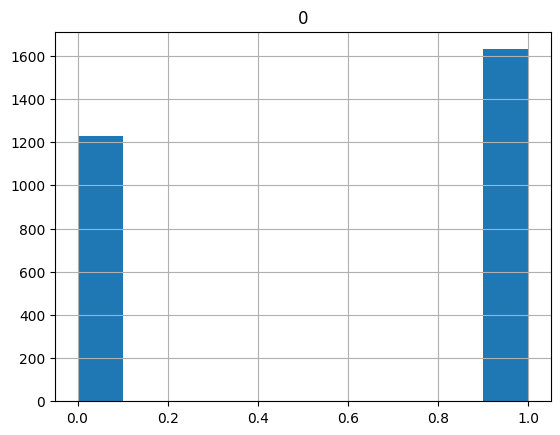

In [12]:
# Show class balance
pd.DataFrame(y_train).hist()

As it is 75% balanced, we will assume that this class imbalance won't affect the model results at all.

If it affects, this can be a fact treated.

# Modelling

The main objective of this notebook is to compare both Neural Networks (NN) and Supporting Vector Machines (SVM) performance against the previous dataset.

Either for NNs or SVMs, there exists a necessity of tunning the parameters of the model. Thus the following steps will appear more complex to the reader than just applying the modelling.



# Neural Network

Even having multiple parameters to be considered in it's training, compiling or building, it is evident that the NN are fairly architecture sensitives.
In that sense, the following code apply combinatory methods to get all possible layouts of NNs with 2, 10 and 50 nodes each, for layers going from 1 to 5.

To make it clear, all of these parameters aren't set according to any specific criterion, but just random selection by the author as the computational resources aren't the bests for training many more possible combinations.

In [13]:

# Permutation of all possible architectures of neural nets
# Use 6 layers

models = []
possible_units = []

possible_nodes = [2, 10, 50] #[2, 4, 8, 16]
possible_layer_amounts = range(1, 6) # 1 to 5

# Get all possible combinations
for layer_amount in possible_layer_amounts:
    units = list(combinations_with_replacement(possible_nodes, layer_amount))
    possible_units.extend(units)

# Remove duplicates
possible_units = list(set(possible_units)) 

# Create a model for each combination
for combination in possible_units:

    # Make model
    model = keras.models.Sequential()
    
    # Input later
    model.add(keras.layers.Input((7, )))
    
    # Add all layers in the combination
    for node in combination:
        model.add(keras.layers.Dense(node, activation='sigmoid'))

    # Exit layer
    model.add(keras.layers.Dense(1, activation='relu'))

    models.append(model)

print(f'Models to be trained: {len(models)}')

Models to be trained: 55


Combinations created, there is a need for measuring their performance.

The following function compiles a possible model, train it against the training set and get it's Matthews Correlation Coefficient (MCC), that will be used as the criterion for model selection in this notebook.

The utilized parameters were selected by the author according to some of the most common methods in the literature.

In [14]:

def get_test_mcc(model) -> float:

    # Compile the model
    compiling_parameters = {
            'optimizer': keras.optimizers.RMSprop(0.01), 
            'loss': 'mse', 
            'metrics': ['binary_accuracy']
        }

    model.compile(**compiling_parameters)

    # Train the model
    history = model.fit(x=X_train, 
                        y=y_train, 
                        epochs=100,
                        batch_size=32,
                        verbose=False
                        )
    
    # Predict test set
    y_pred = model.predict(X_test, verbose=False)
    
    # Fix to 0-1 interval
    y_pred = np.where(y_pred > 0.5, 1, 0)

    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)

    return mcc

With evaluation function, the next chunk evaluates all of the possibilities and build a register of their MCC performance.

In [15]:

print('>>> Checking all possible models')
model_performances = {}

# Check accuracy for each model
for model in tqdm(models):
    model_performances[model] = get_test_mcc(model)

# Show three examples of results
for ind, model_performance in enumerate(model_performances):
    if ind <= 3:
        print(model_performance)

>>> Checking all possible models


100%|██████████| 55/55 [12:37<00:00, 13.78s/it]

<Sequential name=sequential, built=True>
<Sequential name=sequential_1, built=True>
<Sequential name=sequential_2, built=True>
<Sequential name=sequential_3, built=True>


With the measured performances, it is possible to check which ones are the best models.

In [16]:
# Convert model performances into a ordered DataFrame
df_model_performances = pd.DataFrame.from_dict(model_performances, orient='index')
df_model_performances.reset_index(drop=False, inplace=True)
df_model_performances.columns = ['model', 'mcc'] 
df_model_performances.sort_values('mcc', inplace=True, ascending=False)

print('>>> Top 5 performances')
df_model_performances.head(5)


>>> Top 5 performances


,model,mcc
33,"<Sequential name=sequential_33, built=True>",0.858960
6,"<Sequential name=sequential_6, built=True>",0.856552
45,"<Sequential name=sequential_45, built=True>",0.855315
22,"<Sequential name=sequential_22, built=True>",0.855087
41,"<Sequential name=sequential_41, built=True>",0.854176


With it, the best model is selected and shown below.

In [17]:
# Get the best model
best_model = df_model_performances.head(1)['model'].max()

print('>>> The best model structure found was:')
best_model.summary()


>>> The best model structure found was:


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)               │ (None, 2)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,516 (5.93 KB)

 Trainable params: 757 (2.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 759 (2.97 KB)

According to this structure, one again get the predictions of the model for the test set and calculate the performance metrics of the best neural net built.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
{'f1_score': 0.9393382352941176, 'mcc': 0.8589601126821053, 'accuracy': 0.9307450157397692, 'confusion': array([[376,  27],
       [ 39, 511]])}


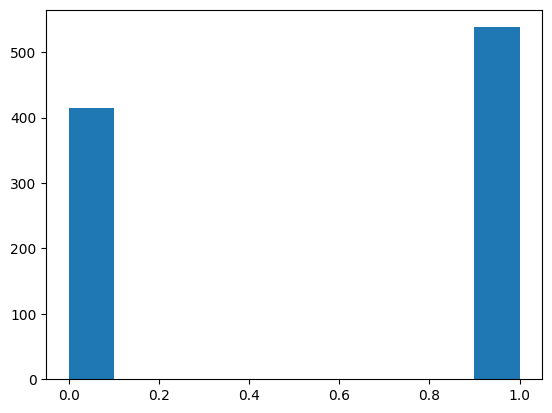

In [18]:

y_pred = best_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
plt.hist(y_pred)

dnn_metricas = {
    'f1_score': f1_score(y_test, y_pred), 
    'mcc': matthews_corrcoef(y_test, y_pred), 
    'accuracy': accuracy_score(y_test, y_pred), 
    'confusion': confusion_matrix(y_test, y_pred)
}

print(dnn_metricas)



# SVM

The same process is applied to Supporting Vector Machines (SVMs).

Unlike Neural Networks, SVMs does not have a node-based architecture. Instead, they rely on numerous parameters that needs to be tuned.
One of the most important parameter is the kernel function.

SVMs use the kernel function in what is known as Kernel Trick. This method increases the dimensionality of input data, allowing transformations of originally non-linear dataset into a linear one. This transformation allows the model to classificate based on non-linear inputs. The primary concern is to determine wich kernel function is the best one for the model.

The following code chunk tests multiple kernel parameters for some of the most common kernel functions: polynomial (with linear being a specific case), gaussian and sigmoid. For polynomial cases, the function degree varies from 1 to 4.

After expanding a grid of possible parameters, all combinations of models are trained and evaluated using the MCC for later comparsion.


In [19]:
# Get the best parameters
# To do so, let's use MCC

possible_svm_parameters = []
possible_svm_results = []

# Possible combinations
possible_svm_parameters = [
    {
        'kernel':kernel, 
        'coef0':coef0, 
        'C':C / 100, 
        'degree': degree
    } 
    for kernel in ['poly', 'rbf', 'sigmoid']
    for coef0 in range(1, 6) if kernel in ['poly', 'sigmoid']
    for C in range(1, 100)
    for degree in range(1, 5) if kernel == 'poly'
    ]

# Train for each combination
print('Training list of possible models')

for parameters in tqdm(possible_svm_parameters):

    svmodel = svm.SVC(random_state=321, **parameters)
    svmodel.fit(X_train, y_train)

    y_hat = svmodel.predict(X_test)

    mcc = matthews_corrcoef(y_test, y_hat)

    result = {
        'mcc': mcc, 
        'parameters': parameters
    }

    possible_svm_results.append(result)

# Just to get log clearer
print('Finished!')

Training list of possible models


100%|██████████| 1980/1980 [01:51<00:00, 17.70it/s]

Finished!


Possible models evaluated, one can check the combinations that led to the best results.

In [20]:
# Convert it into a ordered DataFrame
svm_results = pd.DataFrame.from_dict(possible_svm_results)
svm_results.sort_values('mcc', axis=0, ascending=False, inplace=True)

# Show best models
print('Top 5 parameters')
svm_results.head(5)

Top 5 parameters


,mcc,parameters
5,0.860037,"{'kernel': 'poly', 'coef0': 1, 'C': 0.02, 'deg..."
400,0.858028,"{'kernel': 'poly', 'coef0': 2, 'C': 0.02, 'deg..."
796,0.858028,"{'kernel': 'poly', 'coef0': 3, 'C': 0.02, 'deg..."
4,0.858028,"{'kernel': 'poly', 'coef0': 1, 'C': 0.02, 'deg..."
1192,0.858028,"{'kernel': 'poly', 'coef0': 4, 'C': 0.02, 'deg..."


Getting the measures for the top-performing model enables us to compare SVMs performance with the NNs.

In [21]:
# Retrieve the best model
best = svm_results.head(1)['parameters'].max()

# Train it again with the same parameters
svmodel = svm.SVC(random_state=321, **best)
svmodel.fit(X_train, y_train)

# Get model metrics
y_hat = svmodel.predict(X_test)

svm_metricas = {
    'f1_score': f1_score(y_test, y_hat), 
    'mcc': matthews_corrcoef(y_test, y_hat), 
    'accuracy': accuracy_score(y_test, y_hat), 
    'confusion': confusion_matrix(y_test, y_hat)
}


# Model selection

With the best of two models, it allows to compare one against another.

The reader has to remember that all the below results came from the assumptions during the selection of the models. Hence they are not exclusively the global best results in all possibilities for the data, but the best according to given parameters described earlier. 

In [22]:

# Create a table to compare the best models for each method
model_compare = pd.DataFrame.from_dict([dnn_metricas, svm_metricas]).T
model_compare.columns = ['BestNeuralNet', 'BestSVM']
model_compare


,BestNeuralNet,BestSVM
f1_score,0.939338,0.941283
mcc,0.85896,0.860037
accuracy,0.930745,0.931794
confusion,"[[376, 27], [39, 511]]","[[367, 36], [29, 521]]"


According to the table, the best-performing SVM model outperformed the best Neural Network on unseen data (test set). 

Consequently, it is reasonable to expect this pattern to repeat with new data points.

In simple terms, given the assumptions and prefered metrics (MCC), the SVM model demonstrated better performance than the Neural Network. 